In [1]:
import pickle
from pathlib import Path

import arviz as az
from scipy.stats import entropy
import jax.numpy as jnp
from jax.tree_util import tree_map

In [2]:
state_dir = Path('/tmp/mutational_signatures/gpu/poisson_gamma_believe/78/samples')
pickles = sorted(state_dir.glob('sample_*.pkl'))
# Load the states from the pickles and concatenate along the second axis.
state_checkpoints = []
for p_file in pickles[-6:]:
    with open(p_file, 'rb') as fi:
        state_checkpoints.append(pickle.load(fi))

states = tree_map(lambda *xs: jnp.concatenate(xs, axis=1), *state_checkpoints)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
r_norm = states["poisson_gamma_believe/~/cap_layer"]["r"].sum(axis=-1, keepdims=True)
r_normalised = states["poisson_gamma_believe/~/cap_layer"]["r"] / r_norm
r_entropy = entropy(r_normalised, axis=-1)
# Convert states to arviz inference data.
idata = az.convert_to_inference_data(
    {
        # "c": states["poisson_gamma_believe/~/cap_layer"]["c"],
        "s[r]": r_entropy
    }
)
del states

In [4]:
result = az.summary(idata)
result

/home/hylke/.local/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
s[r],3.391,0.049,3.315,3.457,0.024,0.018,4.0,11.0,4.15


In [5]:
result['r_hat'].min()

4.15

/home/hylke/.local/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<AxesSubplot:title={'center':'s[r]'}>,
        <AxesSubplot:title={'center':'s[r]'}>]], dtype=object)

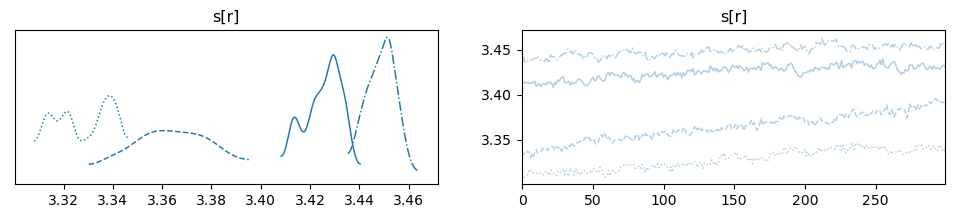

In [6]:
az.plot_trace(idata, var_names=['s[r]'])

/home/hylke/.local/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>]], dtype=object)

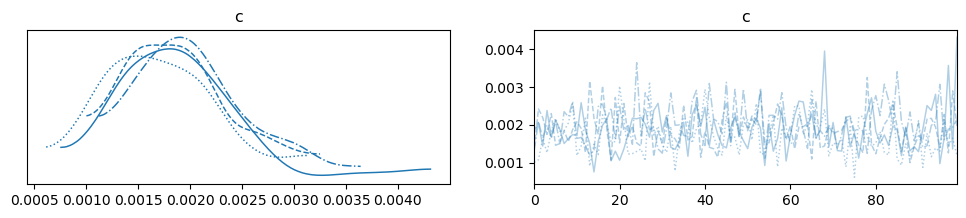

In [10]:
# Plot trace of the first element of `c`.
az.plot_trace(idata, var_names=['c'], coords={'c_dim_0': 0})

/home/hylke/.local/lib/python3.11/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<AxesSubplot:title={'center':'c'}>,
        <AxesSubplot:title={'center':'c'}>]], dtype=object)

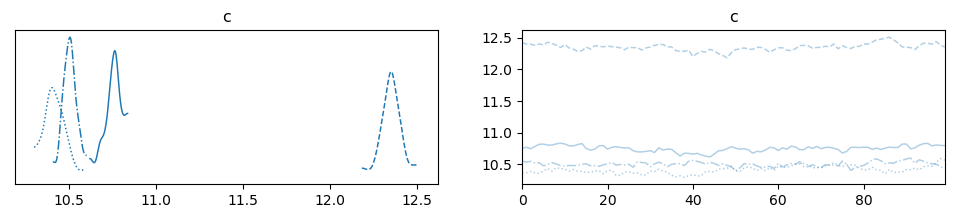

In [8]:
az.plot_trace(idata)